# common color spaces in opencv
opencv provides several color spaces that are used in image processing. lets see the most important ones

1. RGB(red,green,blue)
2. BGR(Blue,Green,Red)
3. HSV(Hue,Saturation, Value)
4. CMYK(cyan,Magenta,Yellow, Black)
5. Grayscale

# Comverting between color spaces in opencv
Lets see how to perform common color space conversions using opencv's cv2.cvtColor() function.


In [21]:
import cv2

img = cv2.imread('sample_parrot-image.jpg')
print(img)

[[[ 29 168 224]
  [ 29 168 224]
  [ 27 168 225]
  ...
  [  0  80 145]
  [  0  80 145]
  [  0  80 145]]

 [[ 29 168 224]
  [ 27 169 224]
  [ 27 168 225]
  ...
  [  0  80 145]
  [  0  80 145]
  [  0  80 145]]

 [[ 27 169 224]
  [ 27 169 224]
  [ 27 168 225]
  ...
  [  0  80 145]
  [  0  80 145]
  [  0  80 145]]

 ...

 [[ 16  24 125]
  [ 16  24 125]
  [ 16  24 125]
  ...
  [ 19  40   1]
  [ 19  40   1]
  [ 20  41   2]]

 [[ 15  23 124]
  [ 15  23 124]
  [ 15  23 124]
  ...
  [ 19  40   1]
  [ 19  40   1]
  [ 20  41   2]]

 [[ 15  23 124]
  [ 15  23 124]
  [ 15  23 124]
  ...
  [ 19  40   1]
  [ 19  40   1]
  [ 20  41   2]]]


In [22]:
cv2.imshow("Display",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow("display", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
cap = cv2.VideoCapture(0)


while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow("WebCam",frame)
    
    if cv2.waitKey(1):
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@1965.922] global cap_v4l.cpp:914 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@1965.922] global obsensor_uvc_stream_channel.cpp:163 getStreamChannelGroup Camera index out of range


In [25]:
cv2.rectangle(img,(50,50),(200,200),(0,255,0),3)
cv2.imshow("display",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
cv2.circle(img, (50, 50), 50, (255, 0, 0), -1)
cv2.putText(img, "OpenCV!", (50, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.imshow("display",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)

cv2.imshow("rgb",img_rgb)
cv2.imshow("Hsv",img_hsv)
cv2.imshow("gray",img_gray)
cv2.imshow("lab",img_lab)
cv2.waitKey(0)
cv2.destroyAllWindows()

Great question 🔥

You want to know **how to detect any color (not just red)** and also **how to map HSV ranges to color names** so you understand which color you’re working with. Let’s break it down:

---

## 🎨 How Colors Work in HSV

* **H (Hue)**: main color tone (0–179 in OpenCV)
* **S (Saturation)**: intensity (0 = gray, 255 = pure color)
* **V (Value/Brightness)**: brightness (0 = black, 255 = full bright)

👉 The most important for color name = **Hue (H)**.

---

## 🖌 Common HSV Color Ranges

| Color      | Hue Range (H)  | Example HSV Range (H, S, V)                                  |
| ---------- | -------------- | ------------------------------------------------------------ |
| **Red**    | 0–10 & 170–180 | `[0,120,70] – [10,255,255]` & `[170,120,70] – [180,255,255]` |
| **Orange** | 11–25          | `[11,100,100] – [25,255,255]`                                |
| **Yellow** | 26–35          | `[26,100,100] – [35,255,255]`                                |
| **Green**  | 36–85          | `[36,100,100] – [85,255,255]`                                |
| **Blue**   | 86–125         | `[86,100,100] – [125,255,255]`                               |
| **Purple** | 126–160        | `[126,100,100] – [160,255,255]`                              |
| **Pink**   | 161–169        | `[161,100,100] – [169,255,255]`                              |

---

## 🔍 How to Detect Any Color

1. Convert image to HSV:

   ```python
   hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
   ```
2. Choose a color range (e.g., blue):

   ```python
   lower_blue = np.array([86, 100, 100])
   upper_blue = np.array([125, 255, 255])
   mask = cv2.inRange(hsv, lower_blue, upper_blue)
   result = cv2.bitwise_and(img, img, mask=mask)
   ```
3. Show result.

---

## 🧪 How to “Understand” Which Color You Click On

You can detect the color **by clicking a pixel** and reading its HSV:

```python
import cv2
import numpy as np

def get_color_name(h):
    if h < 10 or h >= 170: return "Red"
    elif h < 25: return "Orange"
    elif h < 35: return "Yellow"
    elif h < 85: return "Green"
    elif h < 125: return "Blue"
    elif h < 160: return "Purple"
    elif h < 170: return "Pink"
    return "Unknown"

def pick_color(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # left mouse click
        hsv_val = hsv[y, x]
        h, s, v = hsv_val
        print("HSV:", hsv_val, " → Color:", get_color_name(h))

img = cv2.imread("image.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow("Image", img)
cv2.setMouseCallback("Image", pick_color)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

👉 This lets you **click on any pixel** and see its HSV values + approximate **color name**.

---

⚡ Do you want me to extend this so it shows the **color name directly on the image (overlay text)** when you click, instead of just printing in the console?


In [28]:
import numpy as np

# HSV range for detecting RED
lower_red = np.array([0, 255, 70])   # lower bound
upper_red = np.array([10, 255, 255]) # upper bound

# Create mask (white = detected pixels, black = others)
mask = cv2.inRange(img_hsv, lower_red, upper_red)

# Apply mask on original image
result = cv2.bitwise_and(img, img, mask=mask)

# Show result
cv2.imshow("Red Detected",result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [29]:
import cv2
import numpy as np


# Red color ranges
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

# Create masks
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
mask = mask1 + mask2

# Apply mask
result = cv2.bitwise_and(img, img, mask=mask)

# Show result
cv2.imshow("Red Detected", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [31]:
import cv2
import numpy as np

def get_color_name(h):
    if h < 10 or h >= 170: return "Red"
    elif h < 25: return "Orange"
    elif h < 35: return "Yellow"
    elif h < 85: return "Green"
    elif h < 125: return "Blue"
    elif h < 160: return "Purple"
    elif h < 170: return "Pink"
    return "Unknown"

def pick_color(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  # left mouse click
        hsv_val = hsv[y, x]
        h, s, v = hsv_val
        print("HSV:", hsv_val, " → Color:", get_color_name(h))

img = cv2.imread("sample_parrot-image.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow("Image", img)
cv2.setMouseCallback("Image", pick_color)
cv2.waitKey(0)
cv2.destroyAllWindows()


HSV: [  1 195 201]  → Color: Red


 Visualizing the Different Color Channels of an RGB Image

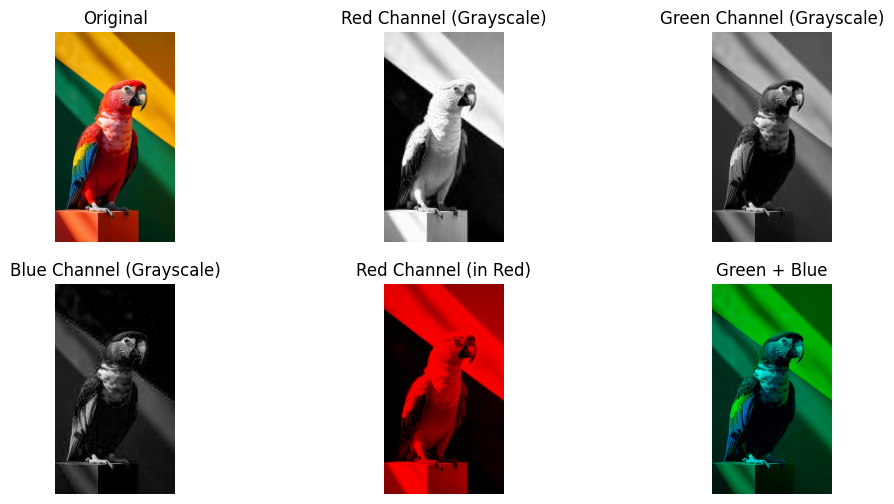

In [32]:
import cv2
import matplotlib.pyplot as plt

# Read image (OpenCV loads as BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split into channels
R, G, B = cv2.split(img_rgb)

# Create blank channel (for visualization)
zeros = np.zeros_like(R)

# Merge to visualize each channel in color
only_R = cv2.merge([R, zeros, zeros])   # Red channel in red
only_G = cv2.merge([zeros, G, zeros])   # Green channel in green
only_B = cv2.merge([zeros, zeros, B])   # Blue channel in blue

# Plot
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(R, cmap="gray")
plt.title("Red Channel (Grayscale)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(G, cmap="gray")
plt.title("Green Channel (Grayscale)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(B, cmap="gray")
plt.title("Blue Channel (Grayscale)")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(only_R)
plt.title("Red Channel (in Red)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(only_G + only_B)  # Show G+B combo
plt.title("Green + Blue")
plt.axis("off")

plt.show()


- Blue Channel (B): This channel highlights the amount of blue in the image. Areas with more blue will appear brighter, while other areas will be darker or gray.
- Green Channel (G): Similar to the blue channel, this displays the green intensity. It plays a important role in natural images, particularly landscapes.
- Red Channel (R): This channel displays red intensity which influences the warmth of the image, highlighting reds, oranges and skin tones.

# Applications of Color Spaces in Image Processing
Object Detection and Tracking (HSV): HSV is ideal for detecting specific colors in an image as it separates color (hue) from intensity (value), making it useful to varying lighting conditions and easier for tracking colored objects.
Image Segmentation (HSV, Grayscale): Color spaces like HSV and Grayscale simplify segmentation tasks by isolating relevant color or intensity information, helping to distinguish foreground from background in images.
Color Correction and Enhancement (RGB): RGB color space is used for adjusting color intensity and correcting image colors, improving visual appeal or compensating for poor lighting conditions in images.
Facial Recognition (Grayscale): Grayscale images are used in facial recognition because they focus on intensity rather than color, making it easier to detect features like edges and shapes.

✅ Excellent notes! You already listed **practical applications of different color spaces** in image processing. Let me refine and expand them a bit for clarity and completeness:

---

# 🌈 Applications of Color Spaces in Image Processing

### 1. **Object Detection and Tracking (HSV)**

* **Why HSV?** Separates *color (hue)* from *brightness (value)*.
* **Application:** Detecting and tracking objects of a specific color (e.g., a red ball in sports, lane lines in autonomous driving).
* **Advantage:** More robust under changing lighting conditions compared to RGB.

---

### 2. **Image Segmentation (HSV, Grayscale)**

* **HSV:** Useful for separating objects based on color.
* **Grayscale:** Focuses only on intensity → simplifies tasks like **thresholding and edge detection**.
* **Application:** Background removal, medical imaging (tumor segmentation), document image binarization.

---

### 3. **Color Correction and Enhancement (RGB)**

* **Why RGB?** Directly represents how colors appear on digital screens.
* **Application:** Adjusting brightness, contrast, white balance, and enhancing poorly lit photos.
* **Use Case:** Photo editing software (Photoshop, Lightroom), improving CCTV footage.

---

### 4. **Facial Recognition (Grayscale)**

* **Why Grayscale?** Reduces complexity (1 channel instead of 3), while preserving **edges, textures, and shapes**.
* **Application:** Face detection (Haar Cascades, LBPH), biometric verification.
* **Benefit:** Faster computation without significant loss of recognition accuracy.

---

### 5. **Medical Imaging (Grayscale, RGB, Pseudo-color)**

* **Grayscale:** X-rays, CT scans, MRI.
* **Pseudo-color (applying colormaps):** Enhances visibility of details (e.g., heat maps for thermal images).
* **Application:** Detecting abnormalities, highlighting regions of interest.

---

### 6. **Video Compression & Broadcasting (YUV, YCbCr)**

* **Why YUV/YCbCr?** Separates luminance (Y) from chrominance (U, V).
* **Application:** Used in JPEG, MPEG, and digital video formats to reduce storage size while maintaining quality.

---

### 7. **Printing & Publishing (CMYK)**

* **Why CMYK?** Matches printer ink colors (Cyan, Magenta, Yellow, Black).
* **Application:** Accurate color reproduction in physical prints.

---

### 8. **Augmented Reality & Virtual Reality (HSV, Lab)**

* **HSV:** Color-based object tracking for AR overlays.
* **CIE Lab:** Perceptually uniform color space, used for realistic rendering.

---

⚡ So in summary:

* **RGB** → display, enhancement, correction.
* **HSV** → color-based detection, segmentation, tracking.
* **Grayscale** → edge detection, recognition, medical imaging.
* **YUV/YCbCr** → video compression.
* **CMYK** → printing.
* **Lab** → perceptual uniformity, color matching.

---

👉 Do you want me to make a **visual diagram/mind map** that shows these color spaces and their applications for easier memorization (like a study cheat sheet)?
